# 0. get X, Y 

In [1]:
import pickle
import getXY 

with open('getXY.pickle', 'rb') as f:
    get = pickle.load(f)

In [2]:
train_padded, y_train_onehot = get.get_train_set()
test_padded, y_test_onehot = get.get_test_set()

# 1. Implementing BiLSTM
[reference link](https://arxiv.org/pdf/1708.00524.pdf)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# !pip install keras-self-attention

In [11]:
from tensorflow.keras import models, layers

vocab_size = np.max(train_padded) + 1
embedding_dim = 200

model = models.Sequential()
model.add(layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim,
                          embeddings_regularizer = 'l2', input_length = 26, mask_zero = True, trainable = True))
model.add(layers.Dropout(0.4))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(20, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 26, 200)           16821600  
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 200)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               135680    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2580      
Total params: 16,959,860
Trainable params: 16,959,860
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings('ignore')


callback_list = [ModelCheckpoint(filepath = 'biLSTM_model.h5', monitor = 'val_loss',
                                                    save_best_only = True),
                 EarlyStopping(patience = 5)]

history = model.fit(train_padded, y_train_onehot, batch_size = 2048, epochs = 10, callbacks = callback_list,
                   validation_data = (test_padded, y_test_onehot))

Train on 321638 samples, validate on 107213 samples
Epoch 1/10
321638/321638 [==============================] - 628s 2ms/sample - loss: 15.0675 - acc: 0.3017 - val_loss: 2.4381 - val_acc: 0.3421
Epoch 2/10
321638/321638 [==============================] - 535s 2ms/sample - loss: 2.4068 - acc: 0.3617 - val_loss: 2.3880 - val_acc: 0.3798
Epoch 3/10
321638/321638 [==============================] - 517s 2ms/sample - loss: 2.3792 - acc: 0.3937 - val_loss: 2.3729 - val_acc: 0.4024
Epoch 4/10
321638/321638 [==============================] - 521s 2ms/sample - loss: 2.3723 - acc: 0.4051 - val_loss: 2.3685 - val_acc: 0.4117
Epoch 5/10
321638/321638 [==============================] - 518s 2ms/sample - loss: 2.3643 - acc: 0.4129 - val_loss: 2.3568 - val_acc: 0.4193
Epoch 6/10
321638/321638 [==============================] - 541s 2ms/sample - loss: 2.3543 - acc: 0.4193 - val_loss: 2.3495 - val_acc: 0.4267
Epoch 7/10
321638/321638 [==============================] - 577s 2ms/sample - loss: 2.3484 - ac

In [17]:
from tensorflow.keras.models import load_model

restored_model = load_model('biLSTM_model.h5')

restored_model.evaluate(test_padded, y_test_onehot, verbose = 1)

107213/107213 [==============================] - 366s 3ms/sample - loss: 2.3346 - acc: 0.4348


[2.3346346420240303, 0.43481666]

In [20]:
restored_model.save_weights('biLSTM_weights.h5')

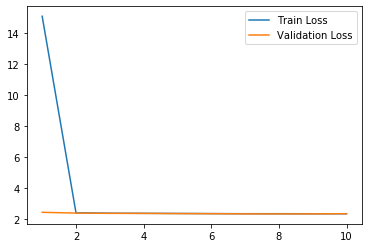

In [18]:
import matplotlib.pyplot as plt
epochs = np.arange(1, 11)
plt.plot(epochs, history.history['loss'], label = 'Train Loss')
plt.plot(epochs, history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.savefig('biLSTM_loss.png')
plt.show()

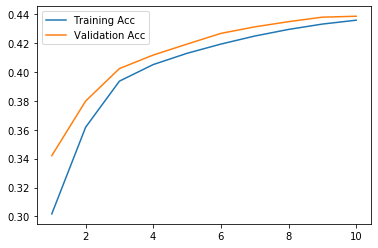

In [19]:
plt.plot(epochs, history.history['acc'], label = 'Training Acc')
plt.plot(epochs, history.history['val_acc'], label = 'Validation Acc')
plt.legend()
plt.savefig('biLSTM_acc.png')
plt.show()